# Решение практической задачи анализа данных в Python

In [2]:
import numpy as np  # импорт модуля Numpy
import pandas as pd  # импорт модуля Pandas
import matplotlib.pyplot as plt  # импорт инструментов визуализации
from mpl_toolkits.mplot3d import Axes3D  # импорт дополнительной функциональности для построения 3D графиков
import seaborn as sns # импорт пакета Seaborn дял визуализации

%matplotlib inline

In [11]:
df = pd.read_csv('data.csv', sep=',') # получение данных из файла

In [12]:
# Создание словаря с полными названиями показателей
feature_names = {
    'skv': 'Drill Id',
    'X': 'X',
    'Y': 'Y',
    'H':'Depth, m',
    'Ip':'Plasticity index, %',
    'Il':'Liquidity index, dimensionless unit',
    'W':'Water content, %',
    'r':'Soil density, g/cm3',
    'rs':'Solid particles density, g/cm3',
    'e':'Void ratio, dimensionless unit',
    'WL':'Liquid limit, %',
    'Wp':'Plastic limit, %',\
    'jn':'Angle of internal friction (natural water content), degree',
    'E12mk.w':'Modulus of deformation (water-saturated soil), MPa',
    'jw':'Angle of internal friction (water-saturated soil), degree',
    'rd':'Dry soil density, g/cm3',\
    'd0.3':'Collapse potentional, dimensionless unit',
    'cluster' : 'Age',
    'qname' : 'Genesis'
}

### Описательный анализ

In [13]:
df.head(7)

,skv,X,Y,H,Ip,Il,W,r,rs,e,WL,Wp,jn,E12mk.w,jw,rd,d0.3,cluster,qname
0,25,472959.832133,89880.697030,4.0,3.95,-1.85,8.80,1.84,2.67,0.579,20.06,16.11,NaN,15.68000,22.78,1.69,0.064,Q,L.epIII-H
1,20,473110.225100,89866.519359,6.0,3.38,-1.79,10.50,1.79,2.67,0.648,19.92,16.54,NaN,15.82000,23.27,1.62,0.038,Q,L.epIII-H
2,18,472997.786596,89870.103594,7.0,4.62,-1.46,9.59,1.79,2.67,0.635,20.96,16.34,NaN,14.84000,27.33,1.63,0.034,Q,L.epIII-H
3,25,472959.832133,89880.697030,8.0,3.95,-1.40,10.85,1.82,2.67,0.626,20.33,16.38,NaN,14.84000,27.02,1.64,0.045,Q,L.epIII-H
4,23,472735.225103,89881.976541,8.8,13.10,0.10,19.93,1.91,2.72,0.708,34.30,21.20,NaN,11.42614,16.70,1.59,0.043,Q,L.epIII-H
5,209,462136.743049,89612.966171,5.8,19.60,0.07,20.30,1.93,2.73,0.702,38.60,19.00,NaN,NaN,22.00,1.60,NaN,Q,L.epIII-H
6,224,462740.500995,89415.115853,7.0,16.70,0.09,17.60,1.87,2.76,0.735,32.80,16.10,NaN,NaN,22.00,1.59,NaN,Q,L.epIII-H


In [14]:
print('Размерность данных: количество строк - {0}, количество колонок - {1}'.format(df.shape[0], df.shape[1]))

Размерность данных: количество строк - 3839, количество колонок - 19


In [15]:
print('Описательная статистика данных:')
df.describe()

Описательная статистика данных:


,X,Y,H,Ip,Il,W,r,rs,e,WL,Wp,jn,E12mk.w,jw,rd,d0.3
count,3839.000000,3839.000000,3839.000000,3818.000000,3595.000000,3800.000000,2789.000000,2831.000000,2729.000000,3615.000000,3594.000000,255.000000,180.000000,160.000000,2756.00000,120.000000
mean,464503.412003,89797.255856,7.738776,17.059791,-0.062749,22.706308,1.909909,2.729893,0.790940,41.658304,23.200701,19.060549,16.590404,19.036938,1.55867,0.021100
std,4032.294577,298.180570,7.212860,9.259444,0.396511,12.195723,0.143442,0.040193,0.302026,15.142534,7.735520,5.466760,5.120645,5.732210,0.20243,0.021737
min,460203.978933,89215.968625,0.000000,0.000010,-4.330000,0.000000,1.000000,2.430000,0.224000,15.200000,11.300000,5.090000,4.300000,0.000000,0.77000,0.001000
25%,461131.647213,89548.071170,2.800000,12.000000,-0.257260,15.500000,1.820000,2.700000,0.609000,31.400000,18.410000,15.755000,12.694494,15.640000,1.48000,0.005000
50%,463063.185178,89789.890606,5.200000,15.390000,-0.014925,19.085000,1.930000,2.720000,0.691000,36.300000,20.740000,20.180000,17.364190,19.295000,1.61000,0.016000
75%,466191.931108,89947.685289,9.900000,21.937500,0.190000,26.100000,2.010000,2.750000,0.860000,48.395000,25.000000,23.270000,20.398155,23.030000,1.69000,0.029500
max,473260.081861,90462.665472,45.000000,69.320000,1.198148,89.000000,2.410000,2.960000,2.572000,116.670000,84.600000,29.250000,27.766976,48.000000,2.20000,0.140000


**ЗАДАНИЕ**<br>
Создайте код, который помогает ответить на вопрос: у скольки образцов в общем массиве данных плотность грунтов больше 2.0 г/cм куб. (столбец r) и коэфициент пористости меньше 0.75 (столбец e)?

In [16]:
#ВАШ КОД
print('У {0} образцов в общем массиве данных плотность грунтов больше 2.0 г/cм куб. (столбец r) и коэфициент пористости меньше 0.75 (столбец e)'
.format(((df[(df['r']>2.0) & (df['e']<0.75)]).shape)[0]))

У 737 образцов в общем массиве данных плотность грунтов больше 2.0 г/cм куб. (столбец r) и коэфициент пористости меньше 0.75 (столбец e)


In [17]:
na_values = []
for col in feature_names.keys():
    na_values.append(df[df[col].isnull()].shape[0])
print('Количество пропущенных значений по каждому показателю:')
pd.DataFrame({'Имя колонки':list(feature_names.values()), 
              'Количество пропущеных значений': na_values,
              'Количество посчитаных значений': df.shape[0] - np.array(na_values)}) \
            .sort_values('Количество пропущеных значений', ascending=False)

Количество пропущенных значений по каждому показателю:


,Имя колонки,Количество пропущеных значений,Количество посчитаных значений
16,"Collapse potentional, dimensionless unit",3719,120
14,Angle of internal friction (water-saturated so...,3679,160
13,"Modulus of deformation (water-saturated soil),...",3659,180
12,Angle of internal friction (natural water cont...,3584,255
17,Age,1121,2718
9,"Void ratio, dimensionless unit",1110,2729
15,"Dry soil density, g/cm3",1083,2756
7,"Soil density, g/cm3",1050,2789
8,"Solid particles density, g/cm3",1008,2831
11,"Plastic limit, %",245,3594


In [18]:
print(na_values)

[0, 0, 0, 0, 21, 244, 39, 1050, 1008, 1110, 224, 245, 3584, 3659, 3679, 1083, 3719, 1121, 103]


**ЗАДАНИЕ**<br>
Визуализируйте данные таблицы 'Количество пропущенных значений по каждому показателю' в виде гистограммы, где по оси Y располагаются имена колонок (показателей), по оси X количество данных. Отобразите два массива данных на данной диаграмме: 'Количество посчитаных значений' и 'Количество пропущеных значений'

In [57]:
table1 = pd.DataFrame({'Имя колонки':list(feature_names.values()), 
              'Количество пропущеных значений': na_values,
              'Количество посчитаных значений': df.shape[0] - np.array(na_values)}).sort_values('Количество пропущеных значений', ascending=False)

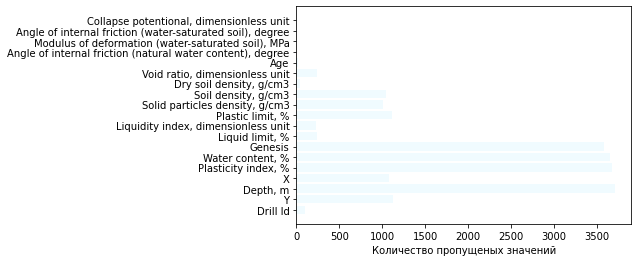

In [58]:
#ВАШ КОД

fig, ax = plt.subplots()
ax.barh(np.arange(len(table1['Имя колонки'])), na_values, align='center')
ax.set_yticks(np.arange(len(table1['Имя колонки'])))
ax.set_yticklabels(table1['Имя колонки'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Количество пропущеных значений')
plt.show()  # отображение графика

In [59]:
coordinates = df[['X', 'Y']].drop_duplicates()
print('Количество уникальных расположений:', coordinates.shape[0])
print('Количество уникальных ID скважин:', df['skv'].unique().shape[0])
print('Среднее количество образцов на 1 уникальный ID скважины:', round(df['skv'].value_counts().mean()))

Количество уникальных расположений: 981
Количество уникальных ID скважин: 914
Среднее количество образцов на 1 уникальный ID скважины: 4


In [60]:
print('Статистика по образцам на 1 уникальный ID скважины:')
print(df['skv'].value_counts().describe())

Статистика по образцам на 1 уникальный ID скважины:
count    914.000000
mean       4.200219
std        3.557440
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       28.000000
Name: skv, dtype: float64


### Ислледование и визуализация данных 

In [21]:
print(feature_names)

{'skv': 'Drill Id', 'X': 'X', 'Y': 'Y', 'H': 'Depth, m', 'Ip': 'Plasticity index, %', 'Il': 'Liquidity index, dimensionless unit', 'W': 'Water content, %', 'r': 'Soil density, g/cm3', 'rs': 'Solid particles density, g/cm3', 'e': 'Void ratio, dimensionless unit', 'WL': 'Liquid limit, %', 'Wp': 'Plastic limit, %', 'jn': 'Angle of internal friction (natural water content), degree', 'E12mk.w': 'Modulus of deformation (water-saturated soil), MPa', 'jw': 'Angle of internal friction (water-saturated soil), degree', 'rd': 'Dry soil density, g/cm3', 'd0.3': 'Collapse potentional, dimensionless unit', 'cluster': 'Age', 'qname': 'Genesis'}


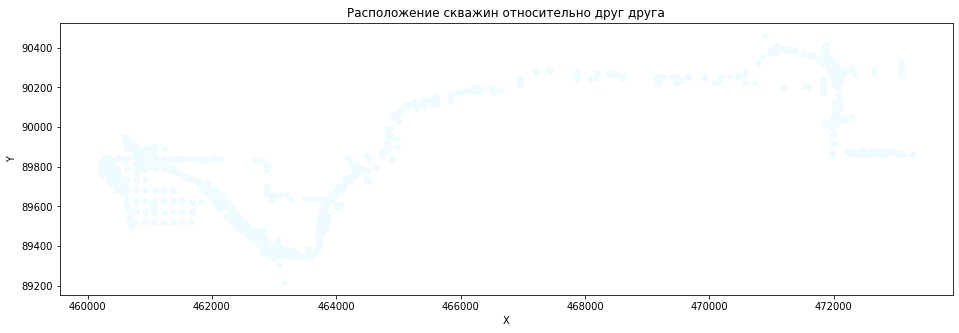

In [61]:
plt.figure(figsize=(16,5))
plt.plot(coordinates['X'], coordinates['Y'], 'o')
plt.title('Расположение скважин относительно друг друга')
plt.xlabel(feature_names['X'])
plt.ylabel(feature_names['Y'])
plt.show()

No handles with labels found to put in legend.


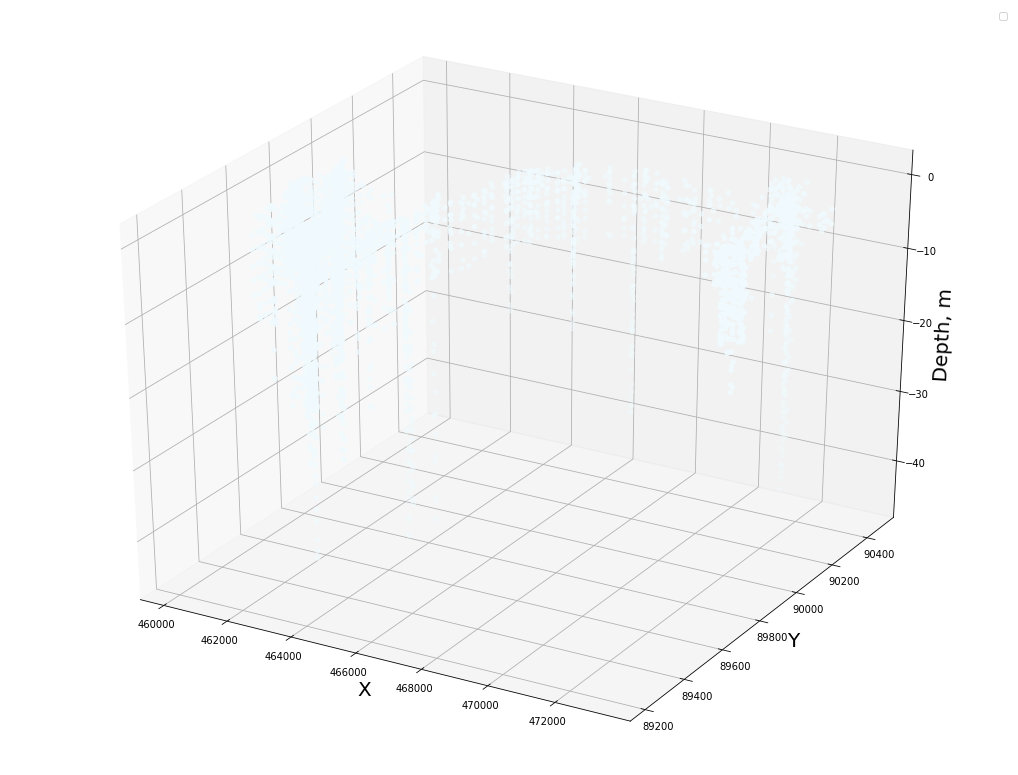

In [62]:
fig = plt.figure(figsize=(18,14))  # установка размера рамки графика
ax = fig.add_subplot(111, projection='3d')  # создание 3D рамки
ax.scatter(df['X'], df['Y'], -df['H'], marker='o')  # создание 3D диаграммы рассеяния с явным указанием типа графика и названия графика для отображения в легенде
ax.set_xlabel(feature_names['X'], fontsize=20)  # подпись оси x с явным указанием размера шрифта
ax.set_ylabel(feature_names['Y'], fontsize=20)  # подпись оси y с явным указанием размера шрифта
ax.set_zlabel(feature_names['H'], fontsize=20)  # подпись оси z с явным указанием размера шрифта
ax.legend()  # создание легенды с названиями элементов графика
plt.show()  # отображение графика

**ЗАДАНИЕ**<br>
Отобразите на 3D диаграмме (подобной выше: X,Y,-H) три группы глубин отбора грунтов: до 10 м, 10-20 м, более 20 м. Раскрасте группы в разные цвета и создайте легенду с обозначением указанных интервалов глубин

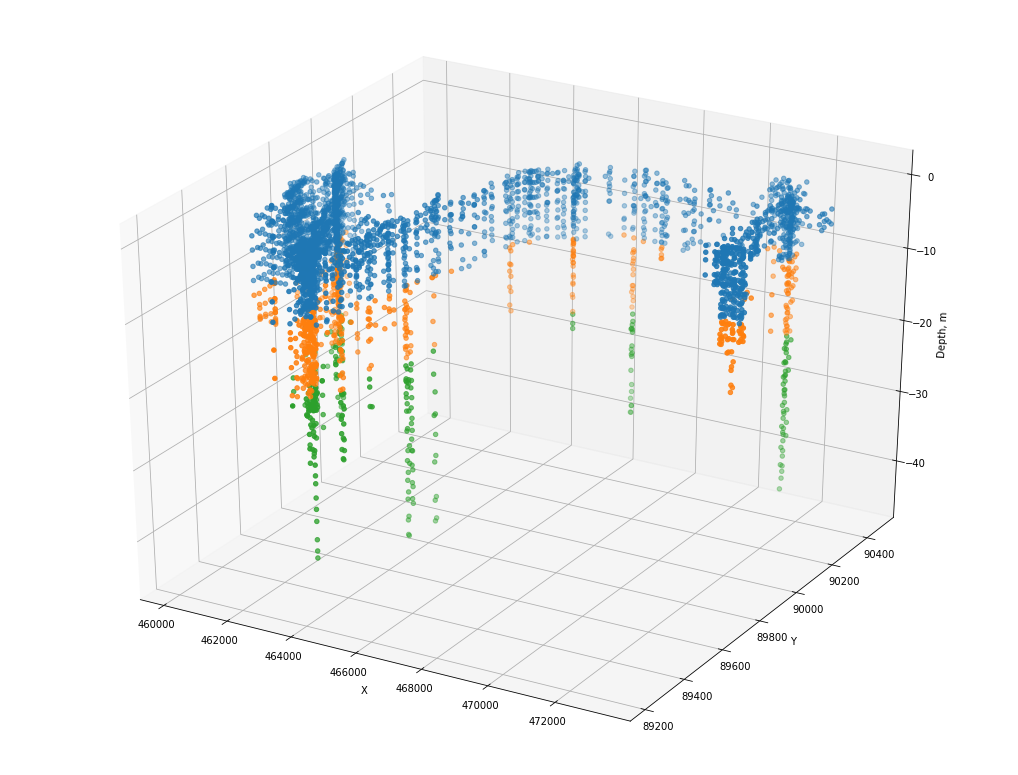

In [36]:
# ВАШ КОД
df_dh10 = df[(df['H'] < 10)]
df_dh10_20 = df[(df['H'] >= 10) & (df['H'] <=20)]
df_dh20 = df[(df['H'] > 20)]
fig = plt.figure(figsize=(18,14))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(df_dh10['X'], df_dh10['Y'], -df_dh10['H'], marker='o')  
ax.scatter(df_dh10_20['X'], df_dh10_20['Y'], -df_dh10_20['H'], marker='o')  
ax.scatter(df_dh20['X'], df_dh20['Y'], -df_dh20['H'], marker='o')  
ax.set_xlabel(feature_names['X']) 
ax.set_ylabel(feature_names['Y'])  
ax.set_zlabel(feature_names['H'])   
plt.show()  


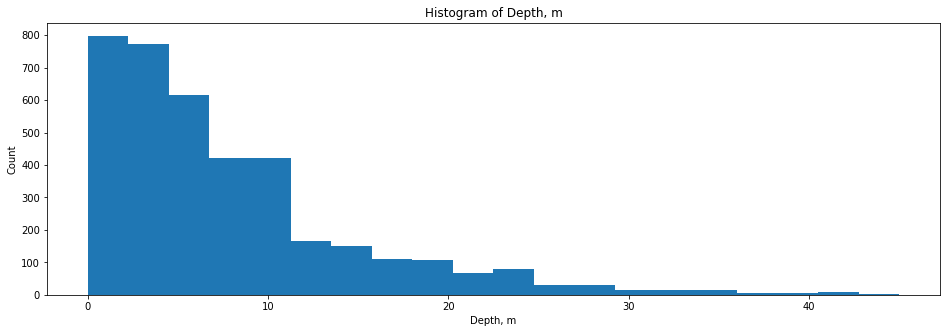

In [24]:
plt.figure(figsize=(16,5))
plt.hist(df['H'], bins=20)
plt.title('Histogram of %s' % feature_names['H'])
plt.xlabel(feature_names['H'])
plt.ylabel('Count')
plt.show()

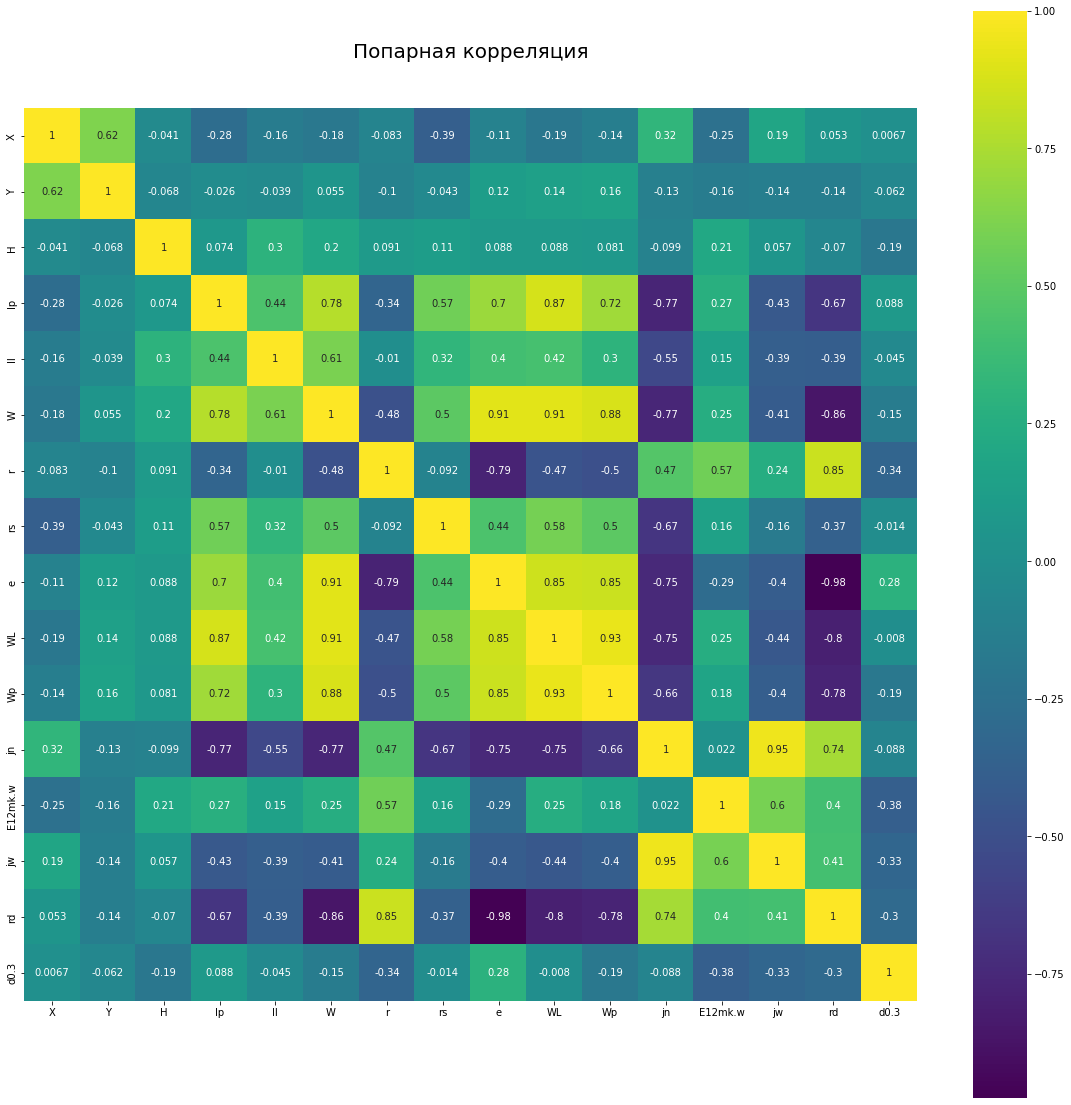

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(df.corr(), square=True, annot=True, cmap=colormap)
plt.show()

In [26]:
# Диаграммы рассеяния для тех пар показателей, у которых высокая степень корреляции или антикорреляции
df_corr = df.corr().unstack().reset_index()
high_corr_features = df_corr[(np.abs(df_corr[0]) > 0.75) & (df_corr['level_0'] != df_corr['level_1'])].values

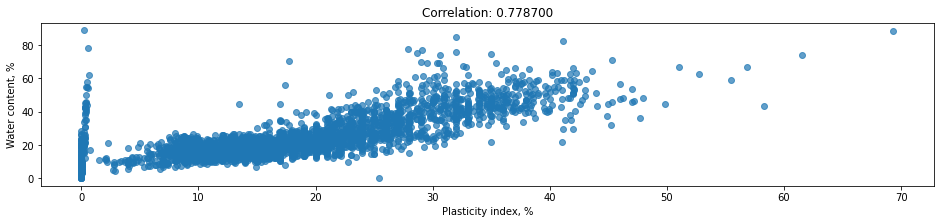

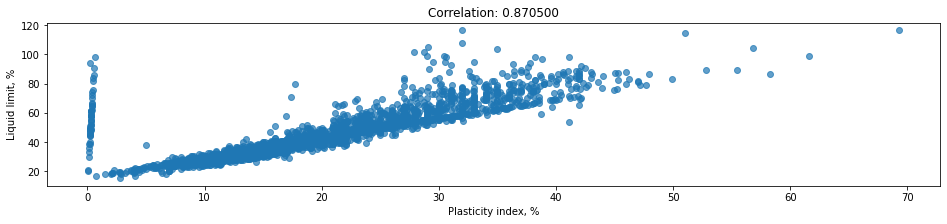

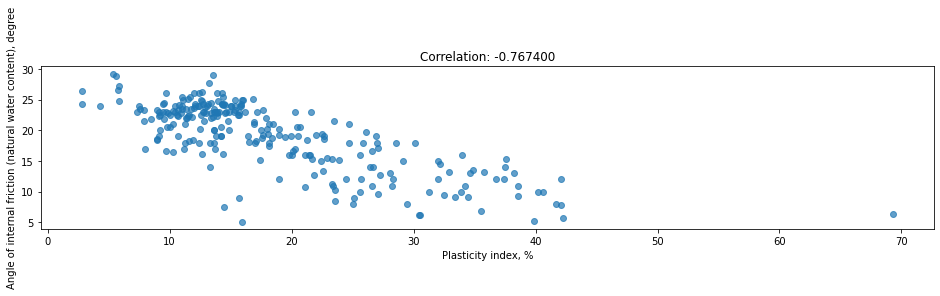

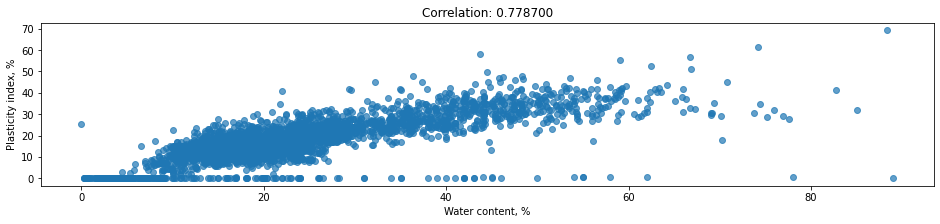

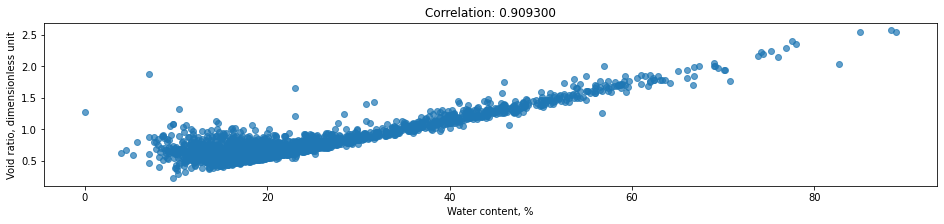

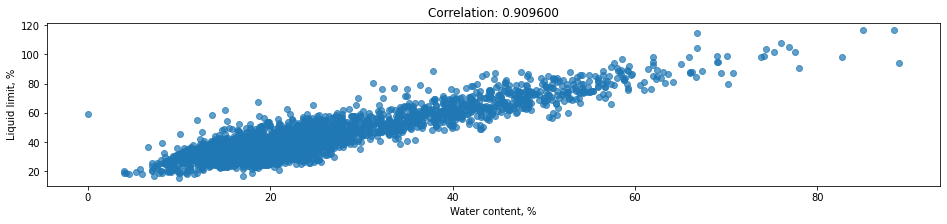

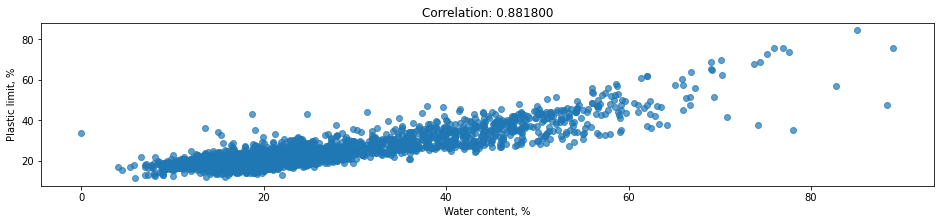

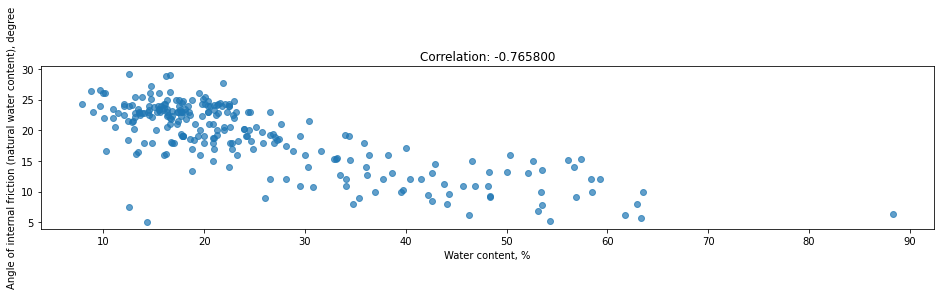

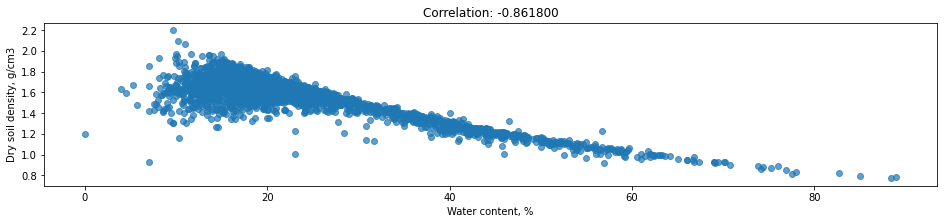

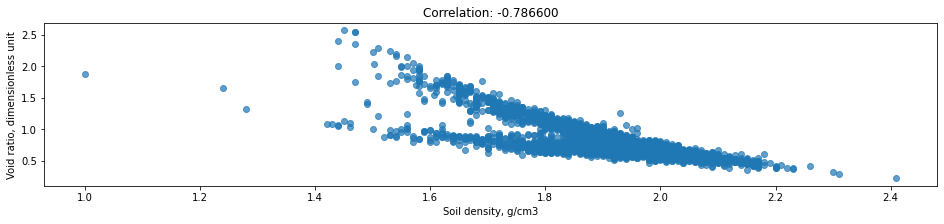

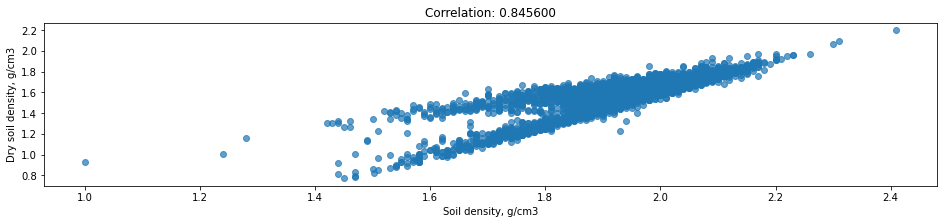

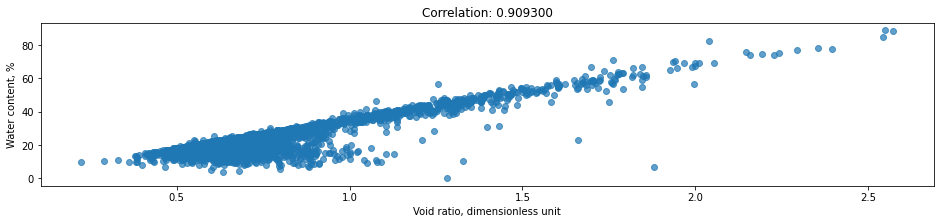

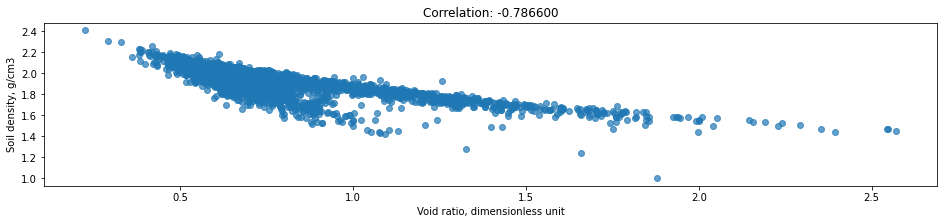

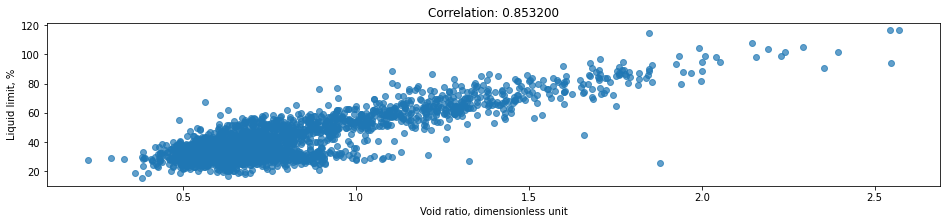

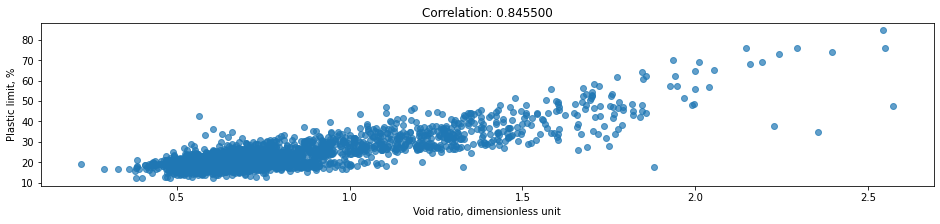

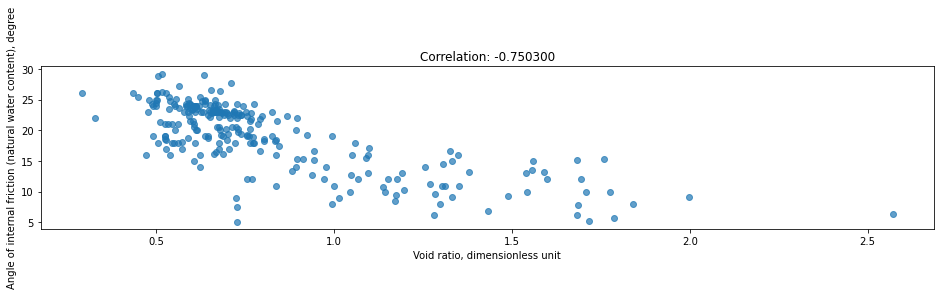

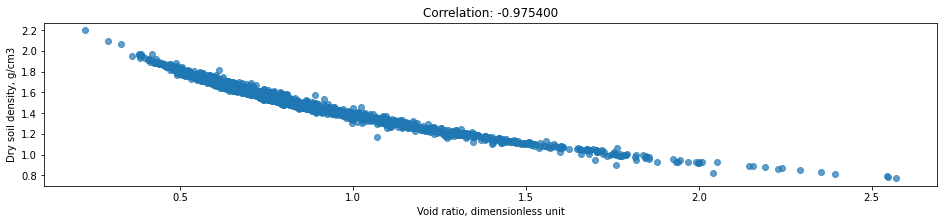

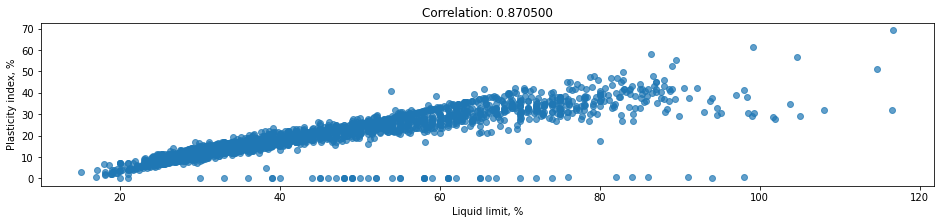

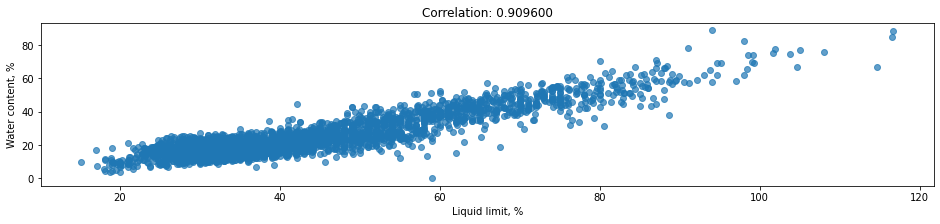

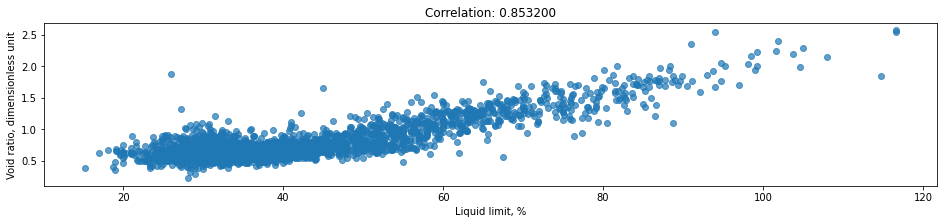

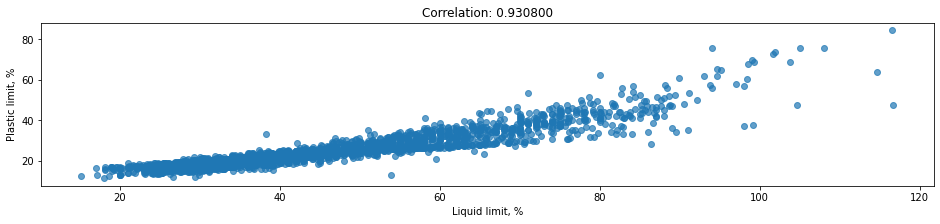

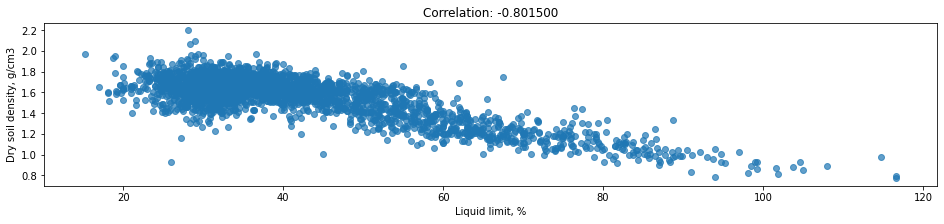

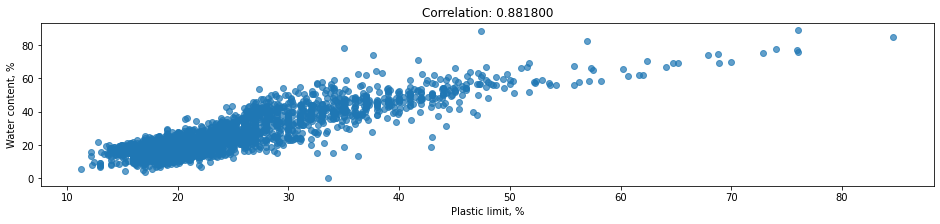

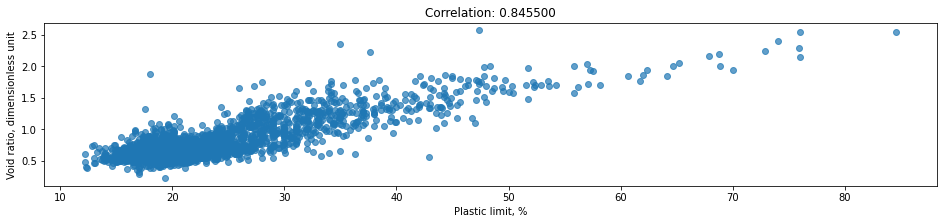

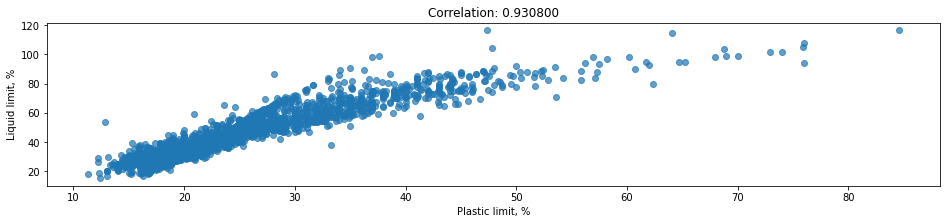

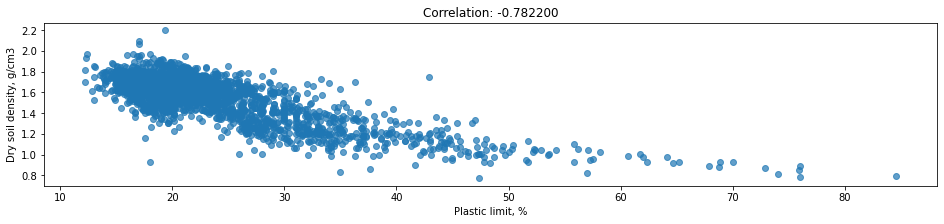

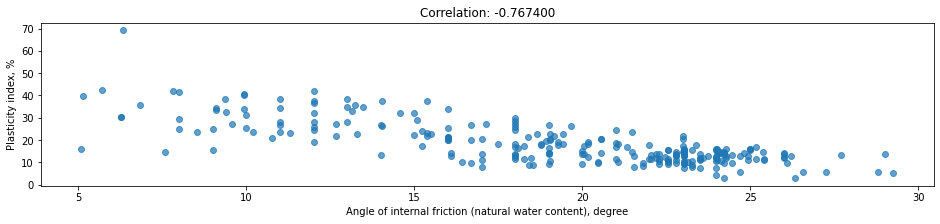

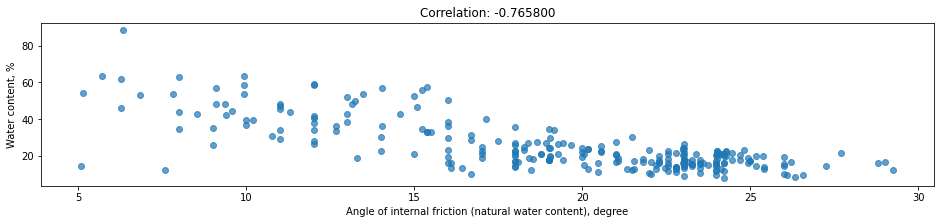

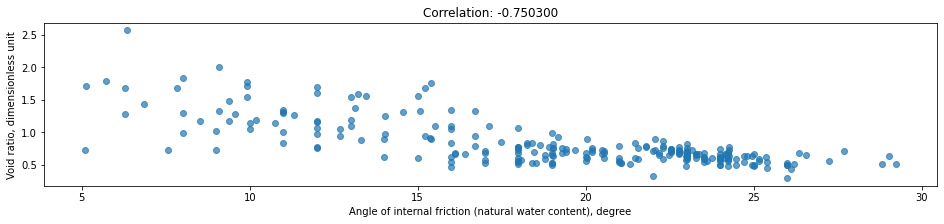

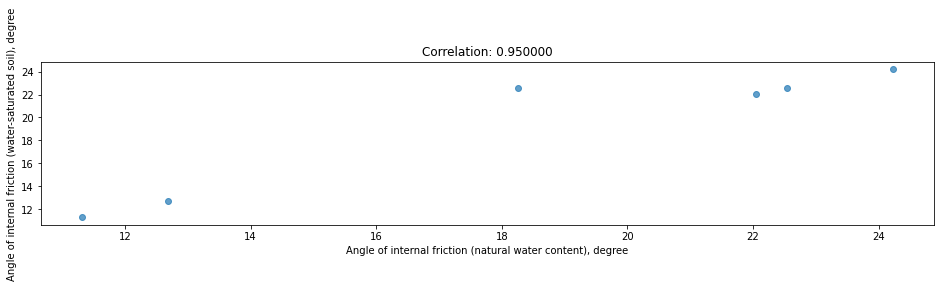

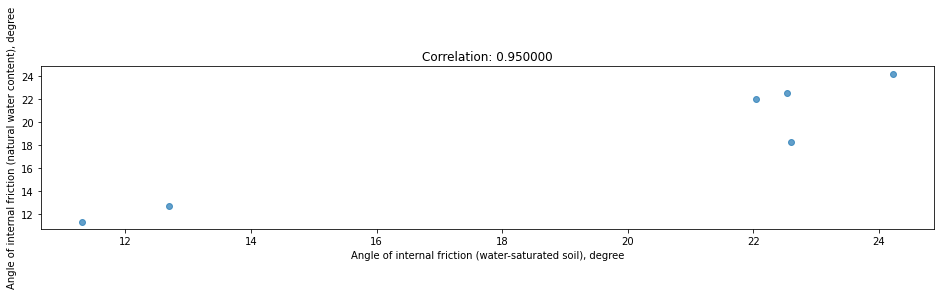

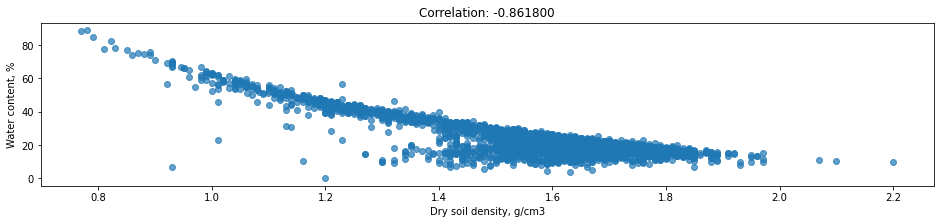

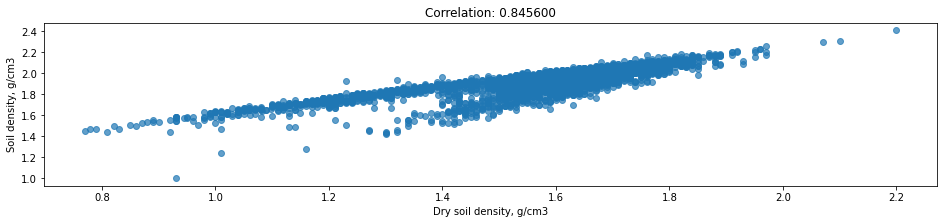

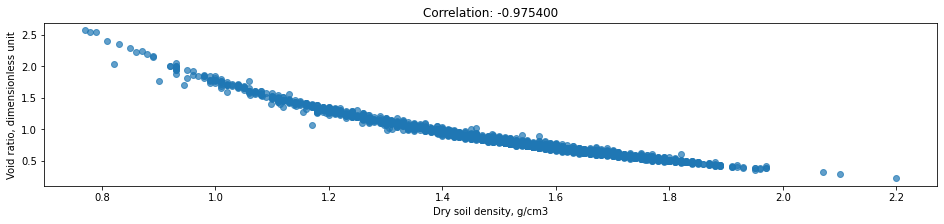

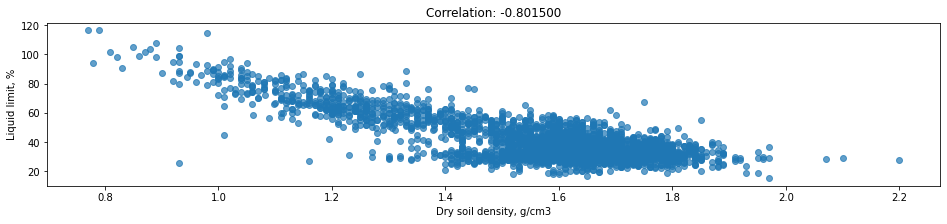

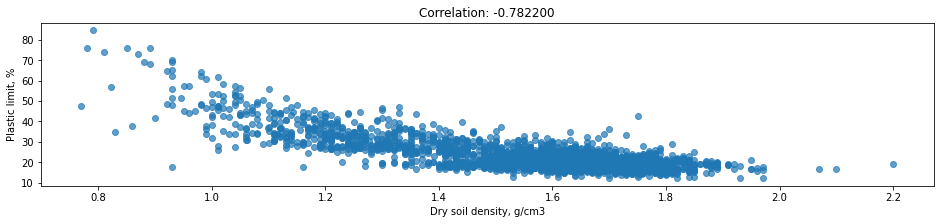

In [27]:
for feature_pair in high_corr_features:
    plt.figure(figsize=(16,3))
    plt.plot(df[feature_pair[0]], df[feature_pair[1]], 'o', alpha=0.7)
    plt.title('Correlation: %f' % round(feature_pair[2], 4))
    plt.xlabel(feature_names[feature_pair[0]])
    plt.ylabel(feature_names[feature_pair[1]])
    plt.show()

**ЗАДАНИЕ**<br>
В вышеуказанном массиве из 36 диаграмм рассеивания встречаются повторы корреляционных пар, например: Ip-Wp и Wp-Ip. Из каждой повторяющейся пары уберите одну лишнюю и отобразите обновленный массив диаграмм рассеивания

In [38]:
# ВАШ КОД
def del_dubl(t):
  t1 = t
  lst_i = []
  lst_j = []
  for i in range(len(t1)):
    for j in range(len(t1)):
      if ((t1[i,0] == t1[j,1]) and (t1[i,1] == t1[j,0])):
        lst_i.append(i)
        lst_j.append(j)
  print(lst_i)
  print(lst_j)
  a = lst_j
  print('do', a)
  lst_k = []
  for k in range(len(lst_i)):
    for l in range(len(lst_j)):
      if (lst_i[k] == lst_j[l]) and (lst_j[k] == lst_i[l]) :
                lst_j[k] = -1 
                lst_k.append(k) 
  res = t[lst_k] 
  return res
high_corr_features = del_dubl(high_corr_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[3, 17, 26, 0, 11, 18, 22, 27, 31, 12, 32, 4, 9, 19, 23, 28, 33, 1, 5, 13, 24, 34, 6, 14, 20, 35, 2, 7, 15, 30, 29, 8, 10, 16, 21, 25]
do [3, 17, 26, 0, 11, 18, 22, 27, 31, 12, 32, 4, 9, 19, 23, 28, 33, 1, 5, 13, 24, 34, 6, 14, 20, 35, 2, 7, 15, 30, 29, 8, 10, 16, 21, 25]


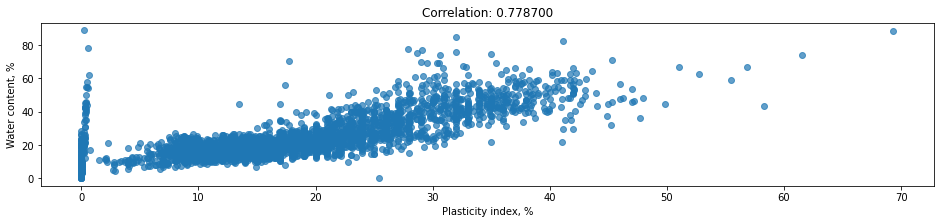

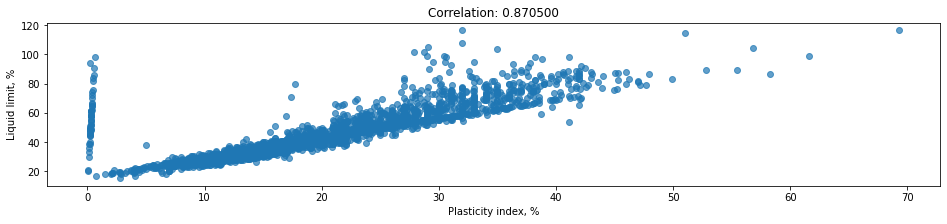

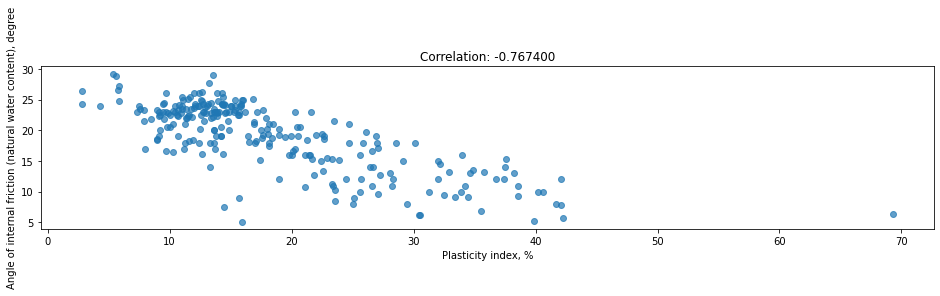

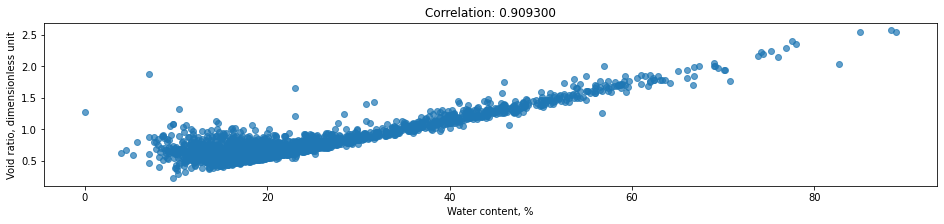

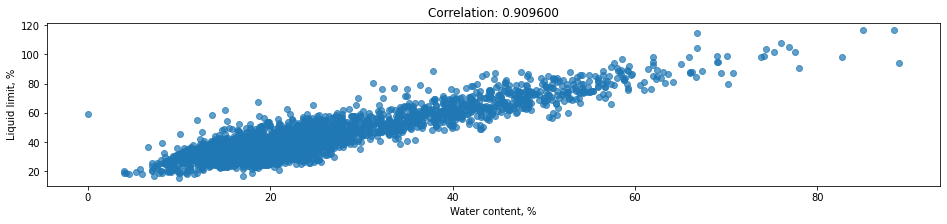

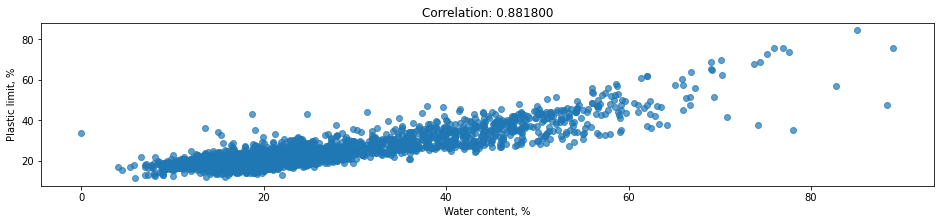

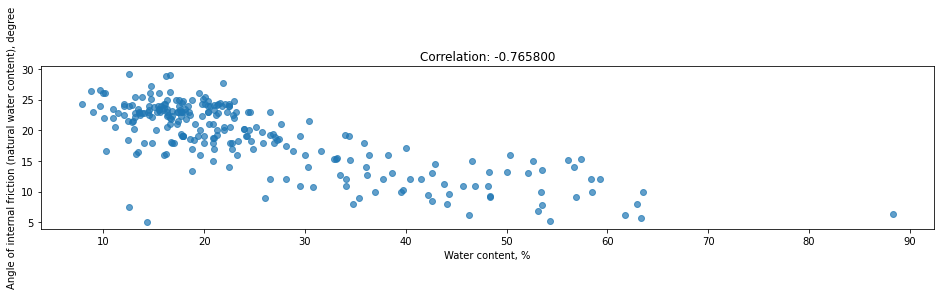

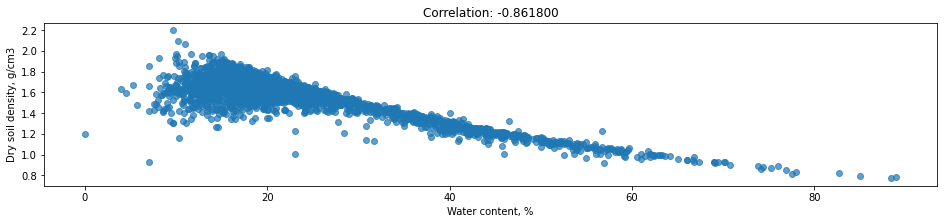

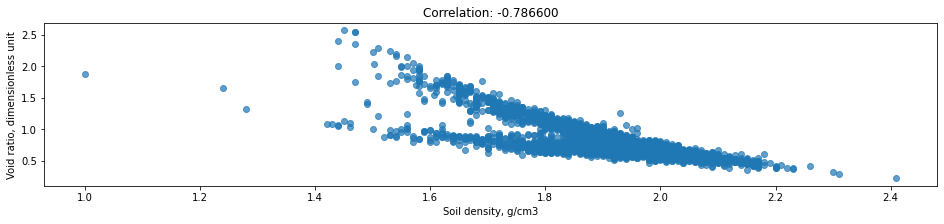

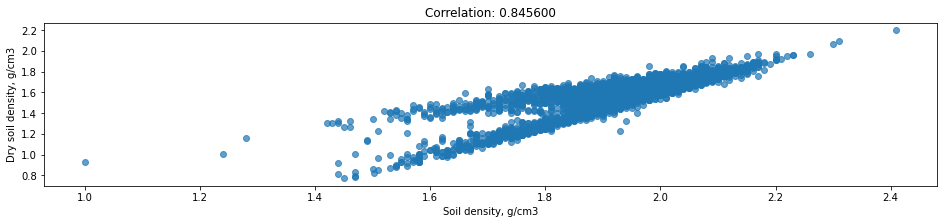

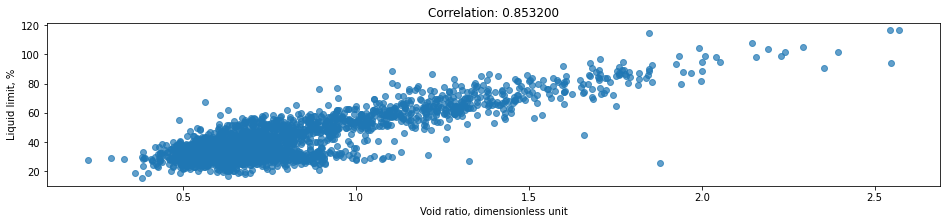

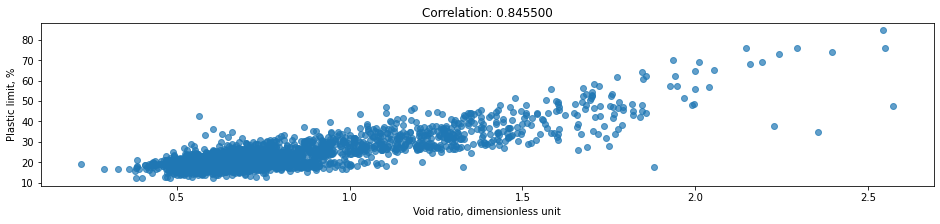

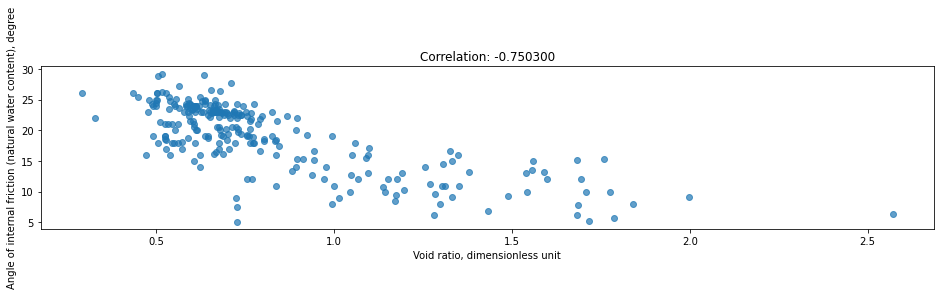

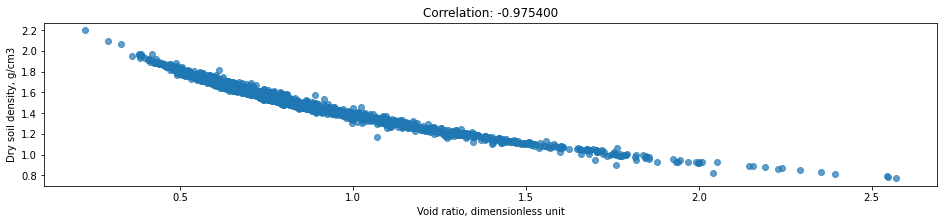

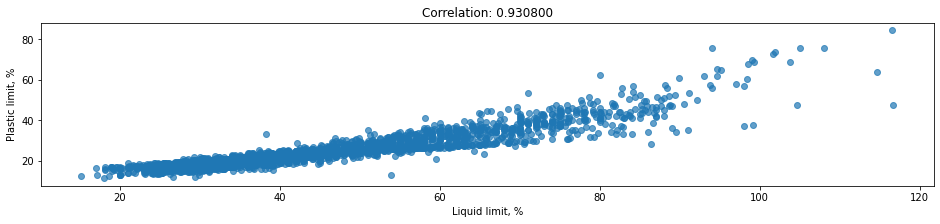

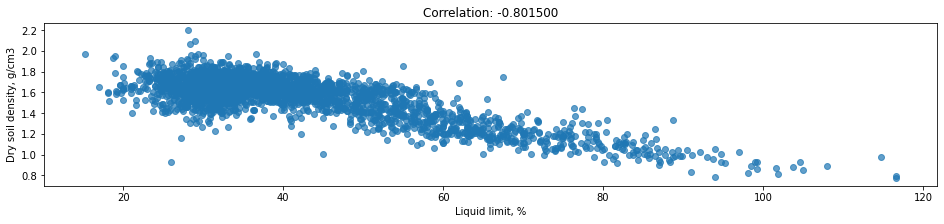

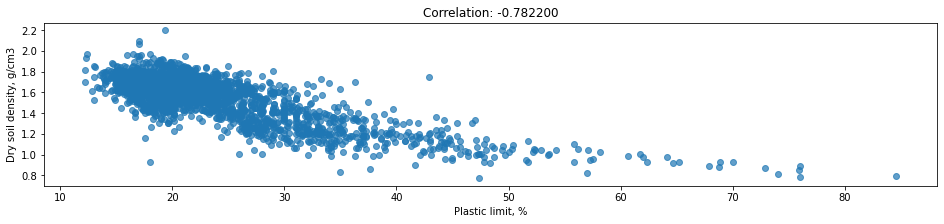

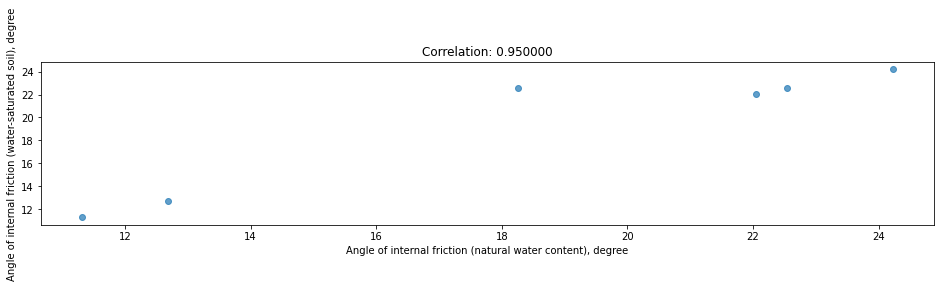

In [39]:
for feature_pair in high_corr_features:
    plt.figure(figsize=(16,3))
    plt.plot(df[feature_pair[0]], df[feature_pair[1]], 'o', alpha=0.7)
    plt.title('Correlation: %f' % round(feature_pair[2], 4))
    plt.xlabel(feature_names[feature_pair[0]])
    plt.ylabel(feature_names[feature_pair[1]])
    plt.show()

### Сравнительный анализ по категориальным переменным

In [41]:
# Убираем пустые значения в категориальной переменной, характеризующей принадлежность 
# грунтов к глобальному возрасту
df_clust = df[pd.notnull(df['cluster'])]

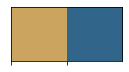

In [42]:
# Создаем палетку для визуализации двух основных кластеров грунтов
q_n_palette = ['#cba560', '#31668a'] ##'Q':'#cba560', 'N':'#31668a'
sns.set_palette(q_n_palette)
sns.palplot(sns.color_palette())

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 6.800000000000011, 'Age')

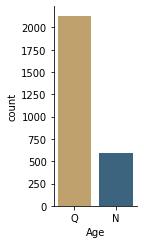

In [43]:
# Оцениваем сбалансированность выборки
sns.factorplot("cluster",data=df_clust, kind="count", size=3.5, aspect=0.6)
plt.xlabel(feature_names['cluster'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(3.6750000000000043, 0.5, 'Liquid limit, %')

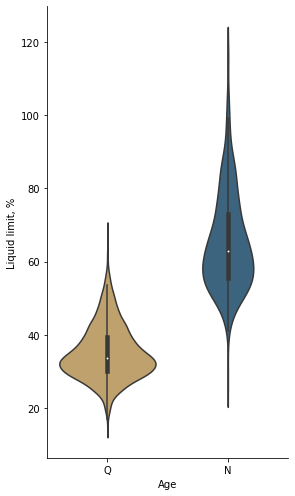

In [44]:
# Визуализируем сравнительный разброс значений в пределах каждого возраста по 
# единичному показателю свойств грунтов (WL)
vp=sns.factorplot(x="cluster", y="WL", data=df_clust,  
                  size=7, aspect=0.6, kind="violin",
                  orient='v',
                  palette=q_n_palette)
plt.xlabel(feature_names['cluster'])
plt.ylabel(feature_names['WL'])
#plt.ylim(15, 90)

In [45]:
# Убираем пустые значения в категориальной переменной, характеризующей принадлежность 
# грунтов к четвертичному возрасту и уникальный генезис
df_clust_q = df[pd.notnull(df['qname'])]

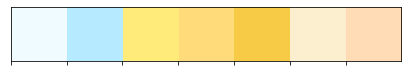

In [46]:
# Создаем палетку для визуализации 7 наиболее распространенных гинетических типов грунтов для четвертичного возраста
q_palette = ['#f0fbff','#b6eaff', '#ffeb7a', '#ffdb7a', '#f7cb46', '#fcefcf', '#ffdcb6']
sns.set_palette(q_palette)
sns.palplot(sns.color_palette())

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 6.799999999999983, 'Genesis')

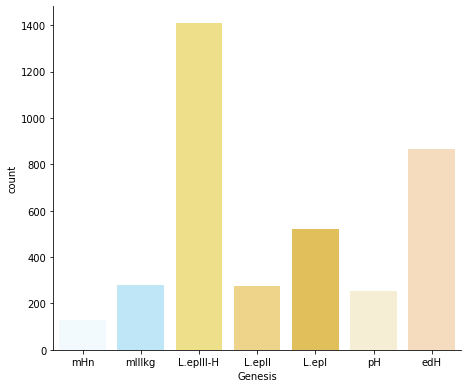

In [47]:
# Оцениваем сбалансированность выборки
sns.factorplot("qname",data=df_clust_q, 
               order=['mHn','mIIIkg','L.epIII-H', 'L.epII','L.epI', 'pH','edH'],
               kind="count", size=5.5, aspect=1.2)
plt.xlabel(feature_names['qname'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(10.050000000000004, 0.5, 'Plasticity index, %')

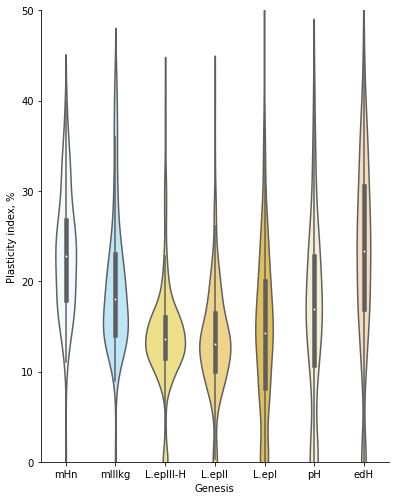

In [48]:
# Визуализируем сравнительный разброс значений в пределах каждого генетического типа по 
# единичному показателю свойств грунтов (Ip)
vp=sns.factorplot(x="qname", y="Ip", data=df_clust_q, 
                  order= ['mHn','mIIIkg','L.epIII-H', 'L.epII','L.epI', 'pH','edH'], 
                  size=7, aspect=0.8, kind="violin",
                  orient='v',
                  palette=q_palette)
plt.ylim(0, 50)
plt.xlabel(feature_names['qname'])
plt.ylabel(feature_names['Ip'])

**ЗАДАНИЕ**<br>
Создайте палетку для отображения категорий в библиотеке seaborn из трех произвольных цветов.
Постройте factorplot(violin) для трех генетических комплексов грунтов: 'edH','mHn','L.epII' с сохранением заданного порядка отображения по оси X.
По оси Y отобразите плотность грунтов (r)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 6.799999999999983, 'Genesis')

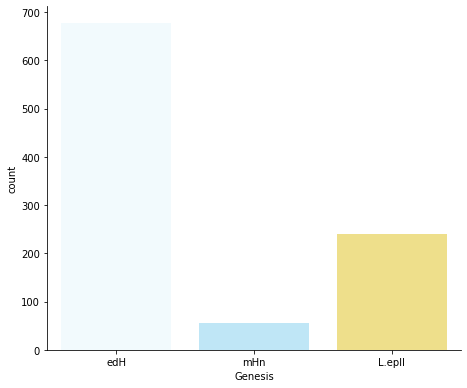

In [49]:
# ВАШ КОД
sns.factorplot("qname",data=df_clust, 
               order= ['edH','mHn','L.epII'],
               kind="count", size=5.5, aspect=1.2)
plt.xlabel(feature_names['qname'])

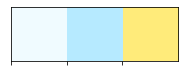

In [50]:
q_palette1 = ['#f0fbff','#b6eaff', '#ffeb7a'] ##'Q':'#cba560', 'N':'#31668a'
sns.set_palette(q_palette1)
sns.palplot(sns.color_palette())

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(6.675000000000004, 0.5, 'Soil density, g/cm3')

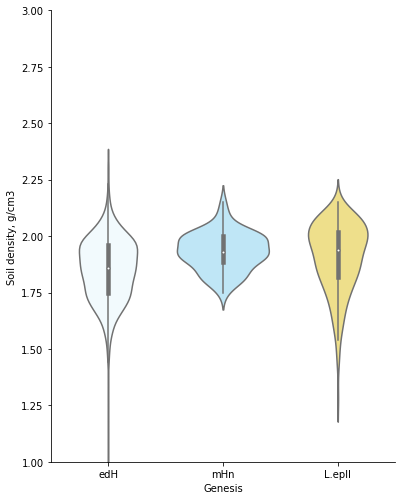

In [51]:
vp=sns.factorplot(x="qname", y="r", data=df_clust, 
                  order= ['edH','mHn','L.epII'],
                  size=7, aspect=0.8, kind="violin",
                  orient='v',
                  palette=q_palette1)
plt.ylim(1, 3)
plt.xlabel(feature_names['qname'])
plt.ylabel(feature_names['r'])